In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
pd.set_option('future.no_silent_downcasting', True)

In [43]:
train_dataset = pd.read_csv('Train.csv')

test_dataset = pd.read_csv('Test.csv')

In [44]:
train_dataset.shape

(8068, 11)

In [45]:
test_dataset.shape

(2627, 10)

In [46]:
train_dataset.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [47]:
train_dataset.dropna(inplace=True)

In [48]:
train_dataset.shape

(6665, 11)

In [49]:
test_dataset.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [50]:
test_dataset.dropna(inplace=True)

In [51]:
test_dataset.shape

(2154, 10)

In [52]:
final_test = test_dataset.copy()

In [53]:
cat_columns = []
num_columns = []

for column in train_dataset.columns:
    if train_dataset[column].dtype == 'object':
        cat_columns.append(column)
    else:
        num_columns.append(column)

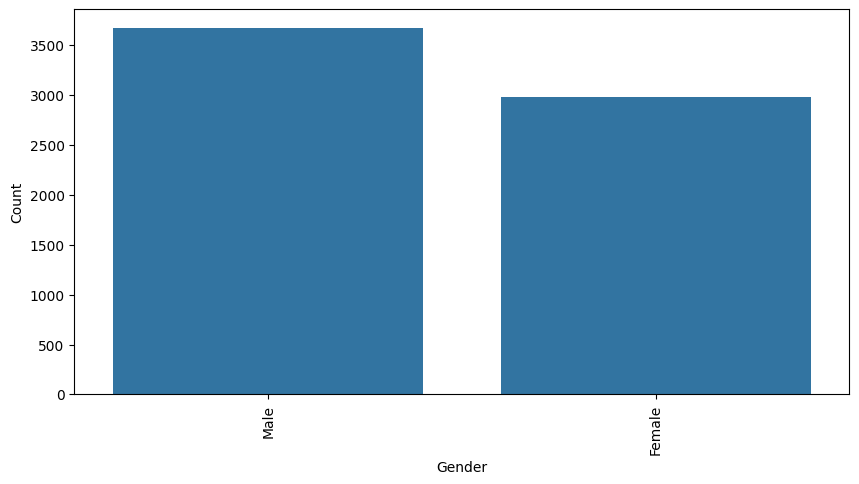

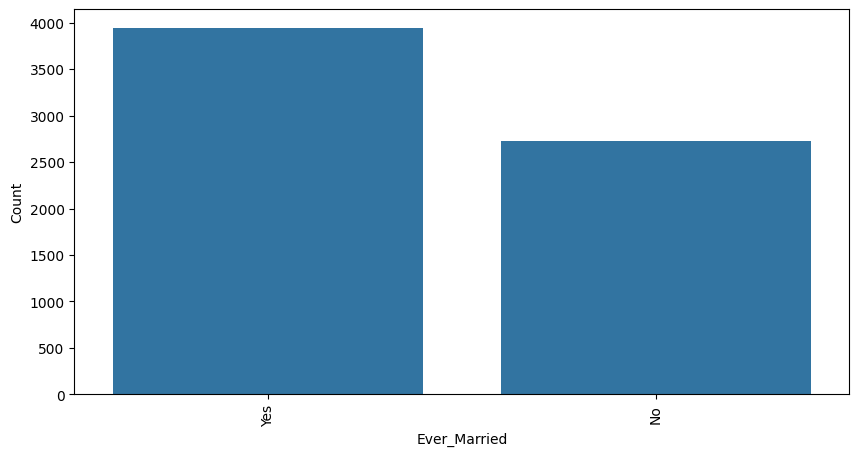

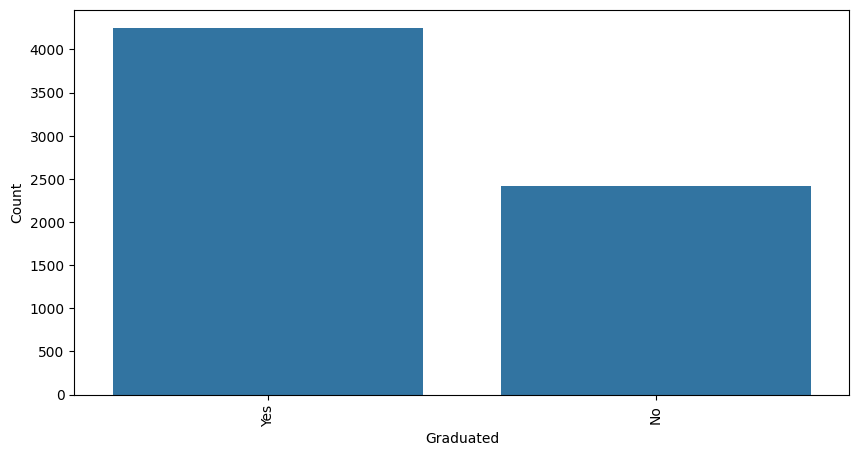

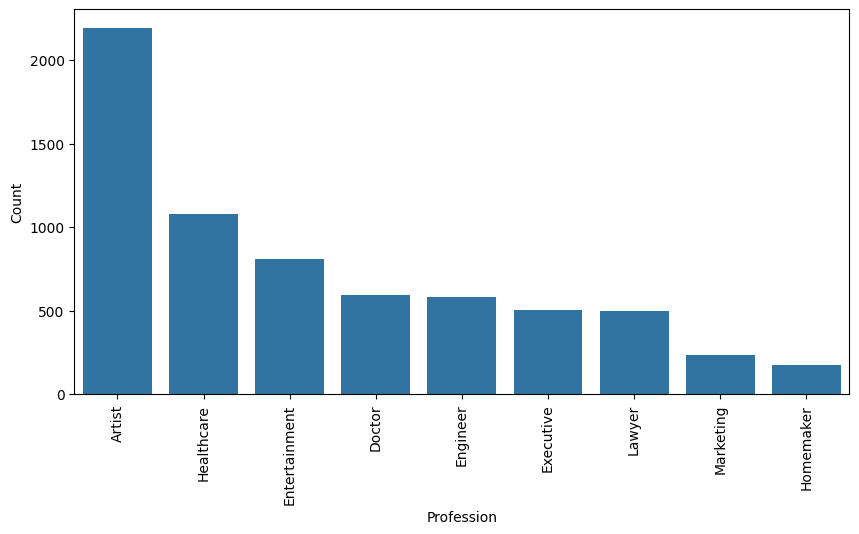

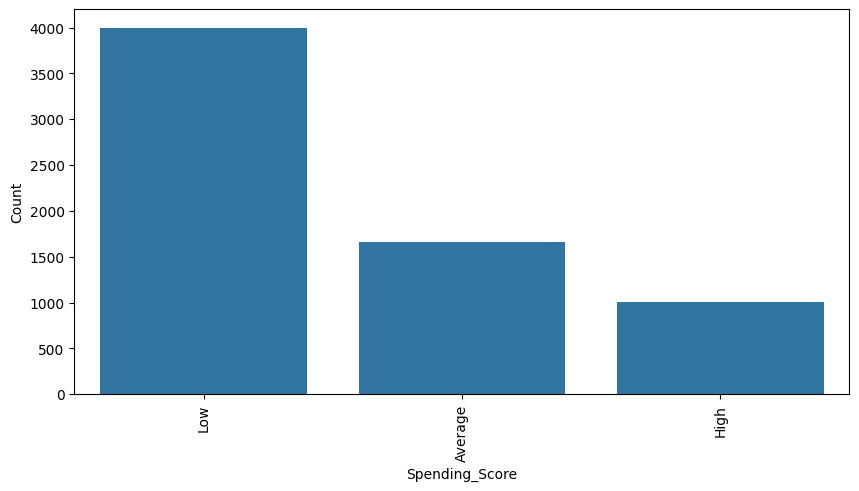

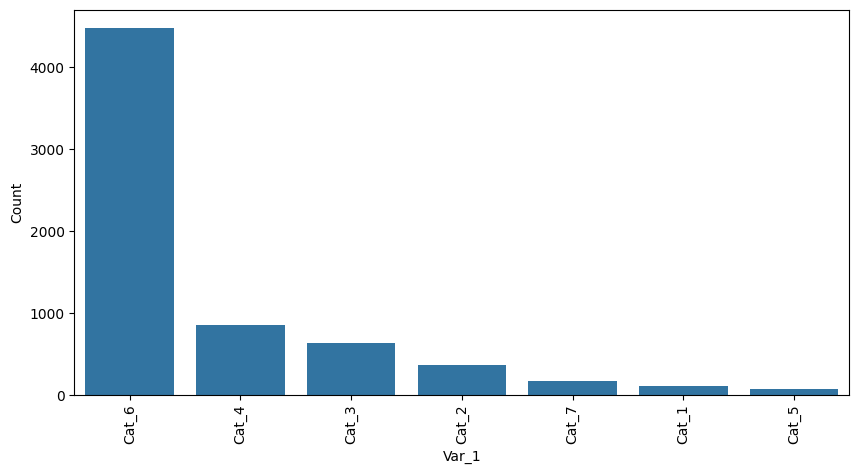

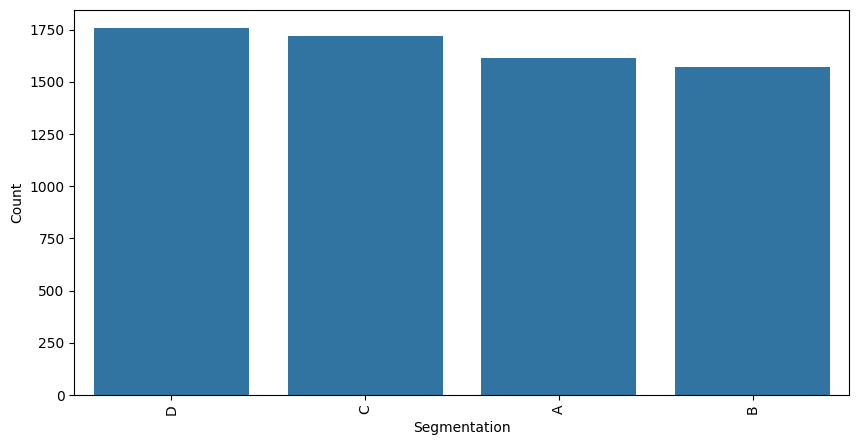

In [54]:
for column in cat_columns:
    value_df = train_dataset[column].value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(x=value_df.index, y=value_df.values)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

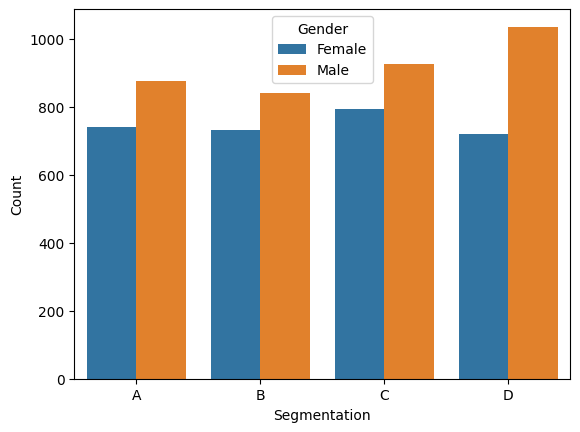

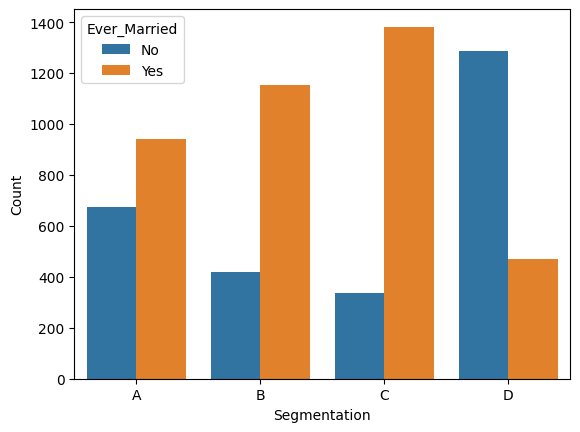

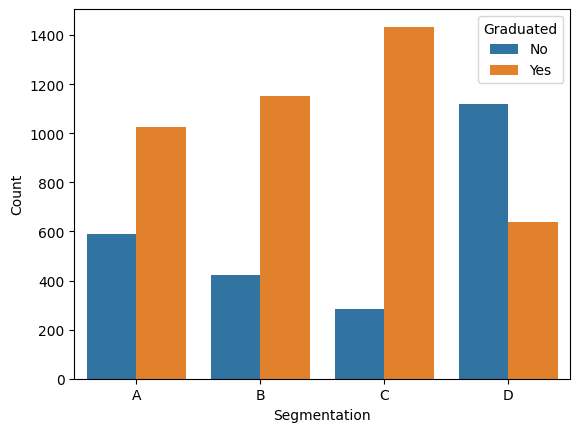

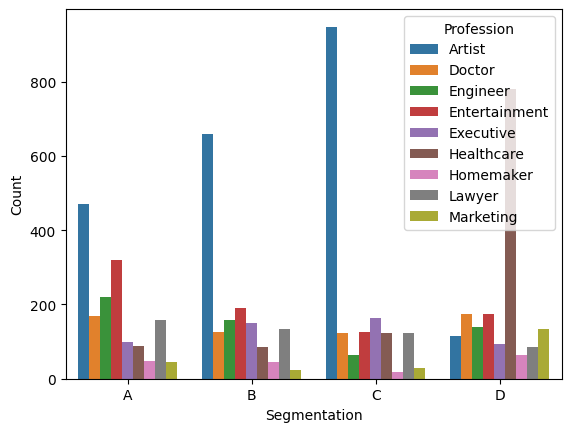

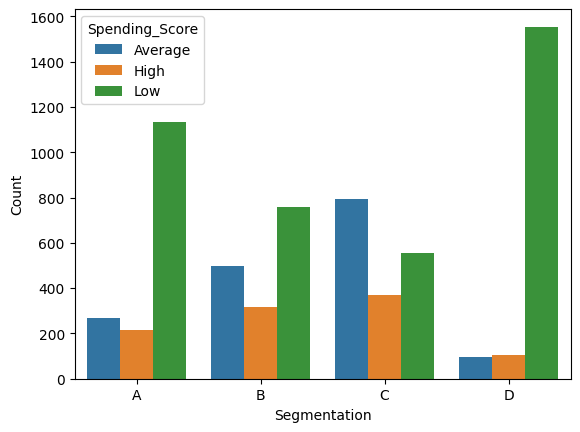

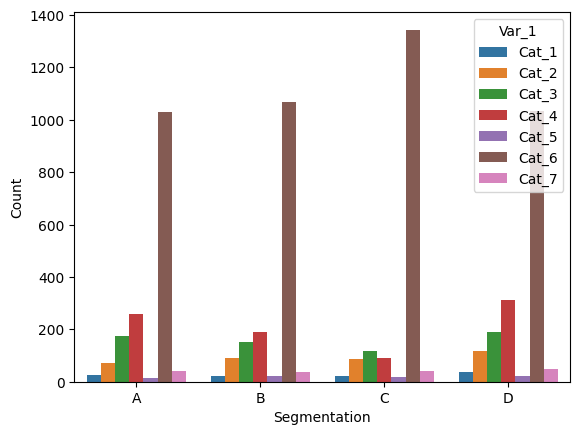

In [ ]:
for column in cat_columns:
    if column != 'Segmentation':
        take = train_dataset.sort_values(column).groupby([column, 'Segmentation']).size().reset_index(name='Count')
        sns.barplot(take, x='Segmentation', y='Count', hue=column, legend=True)
        plt.show()
        

In [56]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [57]:
train_dataset['Gender'] = train_dataset['Gender'].replace({'Male':1, 'Female':2})
train_dataset['Ever_Married'] = train_dataset['Ever_Married'].replace({'Yes':1, 'No':2})
train_dataset['Graduated'] = train_dataset['Graduated'].replace({'Yes':1, 'No':2})
train_dataset['Profession'] = train_dataset['Profession'].replace({'Healthcare':1, 'Engineer':2, 'Lawyer':3, 'Entertainment':4, 'Artist':5, 'Doctor':6, 'Executive':7, 'Homemaker':8, 'Marketing':9})
train_dataset['Spending_Score']= train_dataset['Spending_Score'].replace({'Low':1, 'Average':2, 'High':3})
train_dataset['Var_1'] = train_dataset['Var_1'].replace({'Cat_1':1, 'Cat_2':2, 'Cat_3':3, 'Cat_4':4, 'Cat_5':5, 'Cat_6':6, 'Cat_7':7})
train_dataset['Work_Experience'] = train_dataset['Work_Experience'].astype('int')
train_dataset['Family_Size'] = train_dataset['Family_Size'].astype('int')

In [58]:
train_dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,2,22,2,1,1,1,4,4,D
2,466315,2,1,67,1,2,1,1,1,6,B
3,461735,1,1,67,1,3,0,3,2,6,B
5,461319,1,1,56,2,5,0,2,2,6,C
6,460156,1,2,32,1,1,1,1,3,6,C


In [59]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 185.1+ KB


In [60]:
test_dataset['Gender'] = test_dataset['Gender'].replace({'Male':1, 'Female':2})
test_dataset['Ever_Married'] = test_dataset['Ever_Married'].replace({'Yes':1, 'No':2})
test_dataset['Graduated'] = test_dataset['Graduated'].replace({'Yes':1, 'No':2})
test_dataset['Profession'] = test_dataset['Profession'].replace({'Healthcare':1, 'Engineer':2, 'Lawyer':3, 'Entertainment':4, 'Artist':5, 'Doctor':6, 'Executive':7, 'Homemaker':8, 'Marketing':9})
test_dataset['Spending_Score'] = test_dataset['Spending_Score'].replace({'Low':1, 'Average':2, 'High':3})
test_dataset['Var_1'] = test_dataset['Var_1'].replace({'Cat_1':1, 'Cat_2':2, 'Cat_3':3, 'Cat_4':4, 'Cat_5':5, 'Cat_6':6, 'Cat_7':7})
test_dataset['Work_Experience'] = test_dataset['Work_Experience'].astype('int')
test_dataset['Family_Size'] = test_dataset['Family_Size'].astype('int')

In [61]:
test_dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,2,1,36,1,2,0,1,1,6
1,458994,1,1,37,1,1,8,2,4,6
3,459000,1,1,59,2,7,11,3,2,6
5,459003,1,1,47,1,6,0,3,5,4
6,459005,1,1,61,1,6,5,1,3,6


In [62]:
features_train = train_dataset.drop(columns=['ID', 'Segmentation'])
target_train = train_dataset['Segmentation']

In [63]:
features_test = test_dataset.drop(columns=['ID'])

In [64]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [65]:
model.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [66]:
cross_val_score(model, features_train, target_train, cv=10).mean()

0.5120793207000103

In [67]:
result_target = model.predict(features_test)

In [68]:
final_test['Segmentation'] = result_target

In [69]:
final_test[['ID', 'Segmentation']].to_csv('main_submission.csv', index=False)